In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, ELU, BatchNormalization
from keras import backend
from keras.callbacks import TensorBoard
from keras.optimizers import Adam, SGD
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv("betterSimulation2.csv", index_col=0)

In [3]:
Y = data["sigma"]
X = data.drop(columns=["sigma"], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [21]:
model = Sequential()

In [22]:
model.add(Dense(200, input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(200))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dense(200))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dense(1, activation='relu'))
model.compile(optimizer=Adam(learning_rate=0.01), loss="mae")

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 200)               1200      
                                                                 
 batch_normalization_9 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 200)               0         
                                                                 
 dense_17 (Dense)            (None, 200)               40200     
                                                                 
 batch_normalization_10 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 elu_8 (ELU)                 (None, 200)              

In [24]:
history = model.fit(X_train, y_train,
                    batch_size=1024, epochs=30,
                    validation_split = 0.1,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/30


/Users/ezreal/opt/anaconda3/envs/deep_learning/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


238/238 [==============================] - 4s 12ms/step - loss: 0.2331 - val_loss: 0.2357
Epoch 2/30
238/238 [==============================] - 3s 11ms/step - loss: 0.1299 - val_loss: 0.1309
Epoch 3/30
238/238 [==============================] - 3s 12ms/step - loss: 0.1221 - val_loss: 0.1778
Epoch 4/30
238/238 [==============================] - 3s 11ms/step - loss: 0.1116 - val_loss: 0.1454
Epoch 5/30
238/238 [==============================] - 3s 12ms/step - loss: 0.1104 - val_loss: 0.1322
Epoch 6/30
238/238 [==============================] - 3s 12ms/step - loss: 0.1071 - val_loss: 0.1429
Epoch 7/30
238/238 [==============================] - 3s 11ms/step - loss: 0.1044 - val_loss: 0.1429
Epoch 8/30
238/238 [==============================] - 3s 12ms/step - loss: 0.0997 - val_loss: 0.1172
Epoch 9/30
238/238 [==============================] - 3s 11ms/step - loss: 0.0973 - val_loss: 0.1487
Epoch 10/30
238/238 [==============================] - 2s 10ms/step - loss: 0.1018 - val_loss: 0.1981


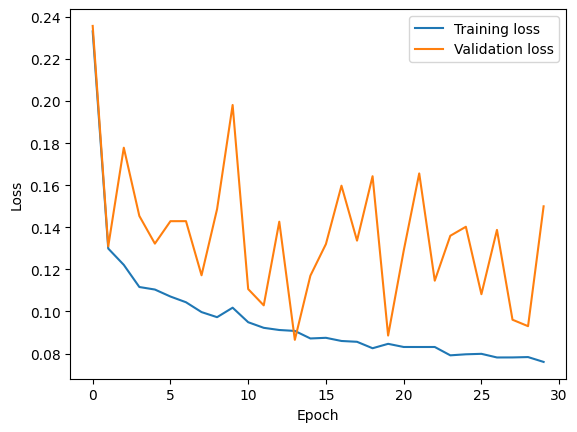

In [32]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [27]:
y_pred = model.predict(X_test)

938/938 [==============================] - 2s 1ms/step


In [28]:
pd.DataFrame(y_pred)

,0
0,0.000000
1,0.552274
2,0.797006
3,0.417451
4,0.000000
...,...
29995,0.097612
29996,0.676669
29997,0.443242
29998,0.042116


In [30]:
pd.DataFrame(y_test)

,sigma
4941,0.676768
51775,0.573737
115253,0.857071
299321,0.462121
173570,0.376263
...,...
199500,0.118687
244038,0.470707
79446,0.427778
276390,0.479293


In [31]:
X_test

,S,K,T,r,call_price
4941,429.369369,90.496037,0.584557,0.016465,3.397743e+02
51775,217.967968,335.488643,2.369123,0.023131,4.909617e+01
115253,401.411411,334.361935,1.177465,0.029596,1.722013e+02
299321,266.036036,136.840740,2.894854,0.011414,1.481076e+02
173570,406.806807,146.447501,0.727673,0.028384,2.633649e+02
...,...,...,...,...,...
199500,244.944945,104.499591,0.876630,0.010000,1.413574e+02
244038,78.178178,501.743813,1.387758,0.023535,1.360923e-02
79446,62.482482,50.777940,0.161051,0.018889,1.237094e+01
276390,265.055055,53.484341,1.688593,0.023737,2.137637e+02


In [41]:
y_test.values

array([0.67676768, 0.57373737, 0.85707071, ..., 0.42777778, 0.47929293,
       0.32474747])

In [44]:
np.mean(np.abs(y_test.values - y_pred.reshape(y_test.shape)))

0.09027865260084621

In [45]:
X_test

,S,K,T,r,call_price
4941,429.369369,90.496037,0.584557,0.016465,3.397743e+02
51775,217.967968,335.488643,2.369123,0.023131,4.909617e+01
115253,401.411411,334.361935,1.177465,0.029596,1.722013e+02
299321,266.036036,136.840740,2.894854,0.011414,1.481076e+02
173570,406.806807,146.447501,0.727673,0.028384,2.633649e+02
...,...,...,...,...,...
199500,244.944945,104.499591,0.876630,0.010000,1.413574e+02
244038,78.178178,501.743813,1.387758,0.023535,1.360923e-02
79446,62.482482,50.777940,0.161051,0.018889,1.237094e+01
276390,265.055055,53.484341,1.688593,0.023737,2.137637e+02


In [46]:
np.abs(y_test.values - y_pred.reshape(y_test.shape))

array([0.42568514, 0.00187833, 0.00482199, ..., 0.07747288, 0.27138236,
       0.31070021])

In [34]:
#perform regression analysis 
T = sm.add_constant(data["T"])
sigma = np.abs(y_test.values - y_pred.reshape(y_test.shape))
model = sm.OLS(sigma,T)
results = model.fit()

NameError: name 'sm' is not defined